In [1]:
import pandas as pd

In [5]:
dic1={'A':[165.0,101.0,29.0],'B':[137.0,92.0,127.0],'C':[472.0,250.0,201.0],'Pro':[192.0,144.0,91.0]}

In [7]:
df=pd.DataFrame(dic1)

#### step-1: To get the f0 function; since we are using loss function as least square method so this f0 function will be just mean of target variable

In [8]:
df['f0(x)']=df['Pro'].mean()

In [9]:
df

,A,B,C,Pro,f0(x)
0,165.0,137.0,472.0,192.0,142.333333
1,101.0,92.0,250.0,144.0,142.333333
2,29.0,127.0,201.0,91.0,142.333333


#### Step-2: now run the loop for said number of decision tree (for our case lets take 2 decision tree only) but first we will do each step separately

##### Step 2.a: getting residual for each rows

In [11]:
df['ri1']=df['Pro']-df['f0(x)']
df

,A,B,C,Pro,f0(x),ri1
0,165.0,137.0,472.0,192.0,142.333333,49.666667
1,101.0,92.0,250.0,144.0,142.333333,1.666667
2,29.0,127.0,201.0,91.0,142.333333,-51.333333


#### step-2.b: training a decision tree ##1

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dt1=DecisionTreeRegressor(max_depth=1)

In [17]:
dt1.fit(df.iloc[:,0:3].values,df.iloc[:,df.shape[1]-1].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667')]

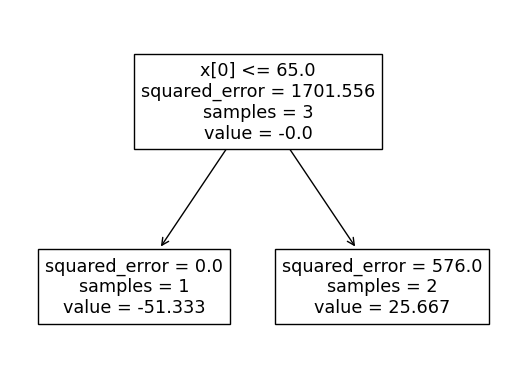

In [20]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [22]:
df['dt1']=pd.Series(dt1.predict(df.iloc[:,0:3]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [24]:
df['f1(x)']=df['f0(x)']+df['dt1']

In [25]:
df

,A,B,C,Pro,f0(x),ri1,dt1,f1(x)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0


### training decision tree ##2 

In [27]:
df['ri2']=df['Pro']-df['f1(x)']
df

,A,B,C,Pro,f0(x),ri1,dt1,f1(x),ri2
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0,24.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0,-24.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0,0.0


In [28]:
dt2=DecisionTreeRegressor(max_depth=1)

In [29]:
dt2.fit(df.iloc[:,0:3].values,df.iloc[:,df.shape[1]-1].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 109.5\nsquared_error = 384.0\nsamples = 3\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -24.0'),
 Text(0.75, 0.25, 'squared_error = 144.0\nsamples = 2\nvalue = 12.0')]

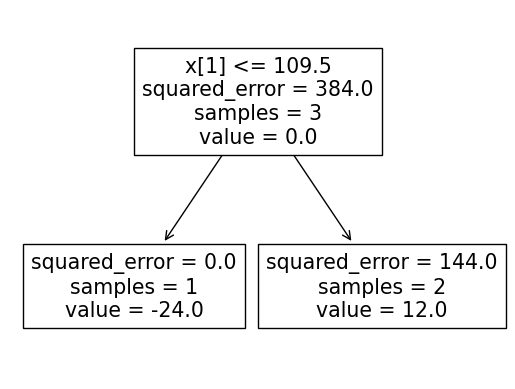

In [31]:
from sklearn.tree import plot_tree
plot_tree(dt2)

In [32]:
df['dt2']=pd.Series(dt2.predict(df.iloc[:,0:3]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [33]:
df

,A,B,C,Pro,f0(x),ri1,dt1,f1(x),ri2,dt2
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0,24.0,12.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0,-24.0,-24.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0,0.0,12.0


In [34]:
df['f2(x)']=df['f1(x)']+df['dt2']

In [35]:
df

,A,B,C,Pro,f0(x),ri1,dt1,f1(x),ri2,dt2,f2(x)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,168.0,24.0,12.0,180.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,168.0,-24.0,-24.0,144.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,91.0,0.0,12.0,103.0
